<h2><u>Supervised Machine Learning</u></h2>

# Module 3 – Evaluating Regression Models
<h2> Demo 2: Learning and Validation Curves  </h2>

In [60]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.tree import DecisionTreeRegressor



In [61]:
# Generate synthetic dataset
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(16))



In [62]:
# Define a decision tree regression model
model = DecisionTreeRegressor(max_depth=5)



In [63]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='neg_mean_squared_error')



In [64]:
# Calculate mean squared error for training and testing sets
train_mse = -np.mean(train_scores, axis=1)
test_mse = -np.mean(test_scores, axis=1)



In [65]:
# Validation Curve
param_range = np.arange(1, 11)
train_scores, test_scores = validation_curve(
    model, X, y, param_name='max_depth', param_range=param_range, cv=5,
    scoring='neg_mean_squared_error')




In [66]:
# Calculate mean squared error for training and testing sets
train_mse_mean = -np.mean(train_scores, axis=1)
test_mse_mean = -np.mean(test_scores, axis=1)



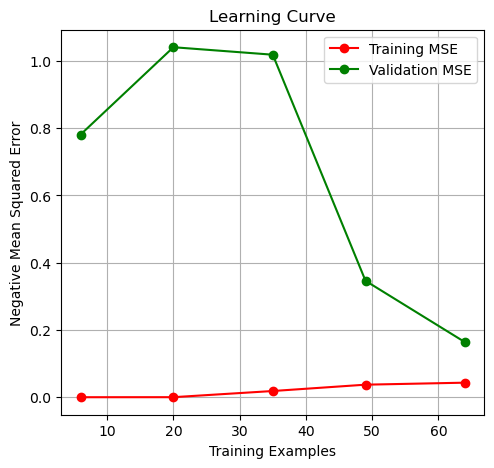

In [67]:
# Plot Learning Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Negative Mean Squared Error")
plt.grid()

plt.plot(train_sizes, train_mse, 'o-', color="r", label="Training MSE")
plt.plot(train_sizes, test_mse, 'o-', color="g", label="Validation MSE")
plt.legend(loc="best")


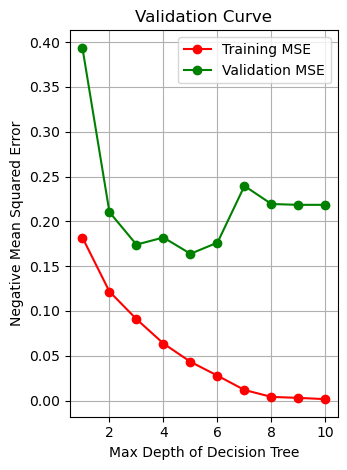

In [68]:
# Plot Validation Curve
plt.subplot(1, 2, 2)
plt.title("Validation Curve")
plt.xlabel("Max Depth of Decision Tree")
plt.ylabel("Negative Mean Squared Error")
plt.grid()
plt.plot(param_range, train_mse_mean, 'o-', color="r", label="Training MSE")
plt.plot(param_range, test_mse_mean, 'o-', color="g", label="Validation MSE")
plt.legend(loc="best")

plt.tight_layout()
plt.show()
